### House Price Prediction 

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
#from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# Loading the Dataset
house_price_dataset = sklearn.datasets.fetch_california_housing()
print(house_price_dataset)



{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
df = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
df['price']=house_price_dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.isnull().sum

<bound method DataFrame.sum of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       L

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
X = df.drop(['price'], axis=1)
Y = df['price']

In [7]:
#splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)


In [8]:
#Linear Regression
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [9]:
print(model.score(X_test,Y_test))

0.6013853272055153


In [11]:
#%pip install xgboost
from xgboost import XGBRegressor


In [13]:
#load the model
model1 = XGBRegressor()
#training the model with X_train
model1.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
print(model1.score(X_test,Y_test))

0.8338000331788725


In [16]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(max_depth=5, random_state=42)
model2.fit(X_train,Y_train)


RandomForestRegressor(max_depth=5, random_state=42)

In [17]:
print(model2.score(X_test,Y_test))

0.6565108646359508


In [20]:
# Make predictions
Y_pred_model = model.predict(X_test)
Y_pred_model1 = model1.predict(X_test)
Y_pred_model2 = model2.predict(X_test)

# Score the models 
score_model = model.score(X_test, Y_test)
score_model1 = model1.score(X_test, Y_test)
score_model2 = model2.score(X_test, Y_test)


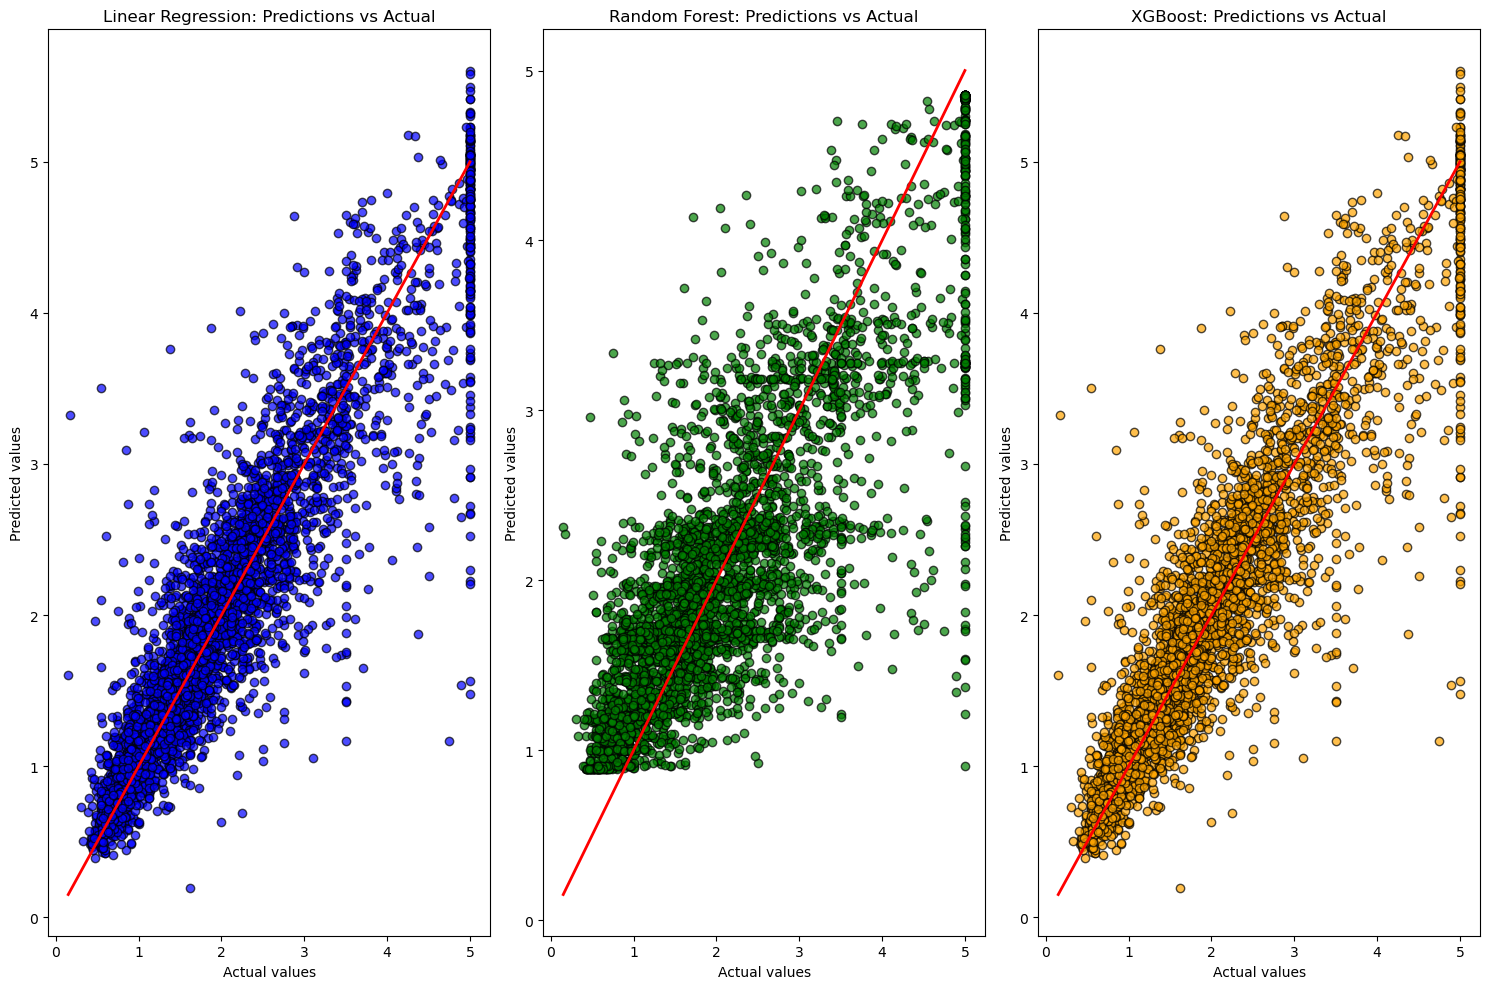

In [22]:
# Plot actual vs predicted values for all models in one figure
plt.figure(figsize=(15, 10))

# Plot for Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(Y_test, Y_pred_model, color='blue', edgecolor='black', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)  # line of perfect prediction
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plot for Random Forest
plt.subplot(1, 3, 2)
plt.scatter(Y_test, Y_pred_model2, color='green', edgecolor='black', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.title('Random Forest: Predictions vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plot for XGBoost
plt.subplot(1, 3, 3)
plt.scatter(Y_test, Y_pred_model1, color='orange', edgecolor='black', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.title('XGBoost: Predictions vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Adjust layout
plt.tight_layout()
plt.show()

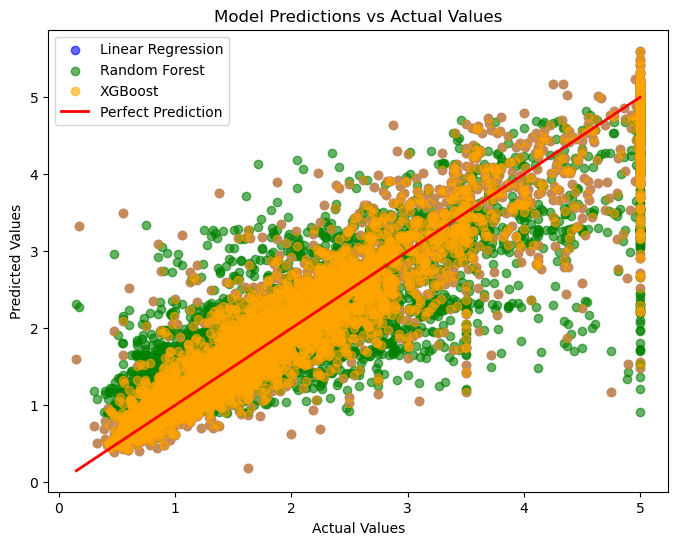

In [23]:
# Plot actual vs predicted values for all models on one scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for actual vs predicted values for Linear Regression, Random Forest, and XGBoost
plt.scatter(Y_test, Y_pred_model, color='blue', label='Linear Regression', alpha=0.6)
plt.scatter(Y_test, Y_pred_model2, color='green', label='Random Forest', alpha=0.6)
plt.scatter(Y_test, Y_pred_model1, color='orange', label='XGBoost', alpha=0.6)

# Plot the perfect prediction line
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()